## Quantum Representations of Audio

This notebooks goes through Quantum Representations of Audio both with Visual and Audio Examples.<br> 

The Quantum Audio package provides core functionalities for:
- **encoding** - circuit preparation given a digital audio array
- **decoding** - reconstructing of audio given a quantum circuit

This can be done through different types of schemes.

___

### Table of Contents
1. [Installation](#installation)
2. [Examples with Signals](#signal-examples)
   - [Loading Signals](#signal-examples)
   - [Single-Channel Quantum Audio Scheme](#single-channel)
       - [Compare Result](#single-channel)
       - [Interaction with Shots](#single-channel)
   - [Multi-Channel Quantum Audio Scheme](#multi-channel)
       - [Compare Result](#multi-channel)
3. [Examples with Audio](#audio)
   - [Loading Audio](#audio)
   - [Interaction with Shots](#audio)
4. [References](#references)
5. [Appendix](#appendix)

___

### 1. Installation <a id="installation"></a>

**Note**: 
It is recommended to use an environment for the following ```pip``` commands to avoid dependency conflicts.
For creating environments and using them with this notebook, please refer [Appendix](#appendix).

In [1]:
#!pip install quantumaudio[all] 

In [2]:
# beta version
#!pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ "quantumaudiopackage==0.1.0b1[all]"

In [3]:
# If using local github
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

In [4]:
import quantumaudio

___

### 2. Examples with Signals <a id="signal-examples"></a>

#### Loading Signals

Digitial Audio contains many thousands of samples each second. The samples can be obtained in Python using libraries of choice such as soundfile, librosa, etc. <br>
For the purpose of visualization, the examples provided in this section uses synthetic signals with shorter number of samples.

In [5]:
from quantumaudio.tools import test_signal, plot

In [6]:
signal = test_signal(num_channels=1,num_samples=8)
stereo_signal = test_signal(num_channels=2,num_samples=8)

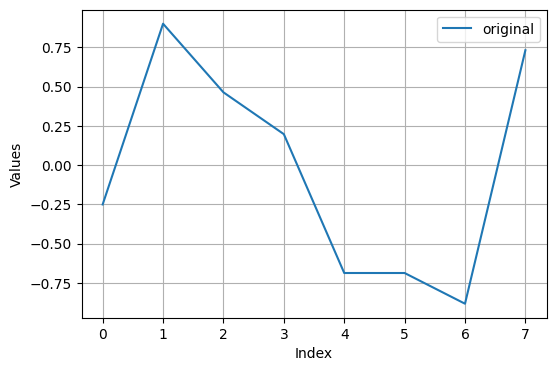

In [7]:
plot(signal)

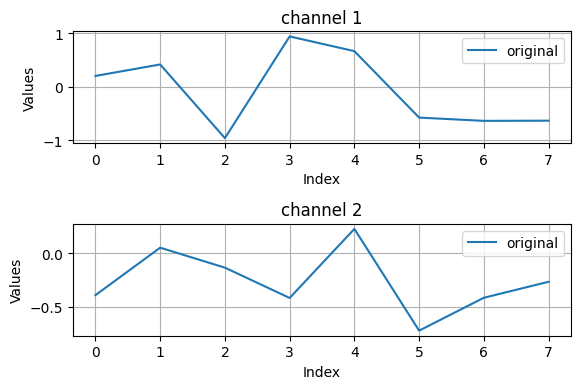

In [8]:
plot(stereo_signal)

____

#### Single-Channel Quantum Audio Scheme <a id="single-channel"></a>

The following schemes included in the package can be used to encode a 1-Dimensional Signal:
- QPAM   : Quantum Probability Amplitude Modulation
- SQPAM  : Single-Qubit Probability Amplitude Modulation
- QSM    : Quantum State Modulation

In [9]:
scheme = quantumaudio.load_scheme('sqpam') # Replace SQPAM with QSM or QPAM to try them out.

Single-Qubit Probability Amplitude Modulation


Number of qubits required: 4

3 qubits for time
1 qubits for amplitude


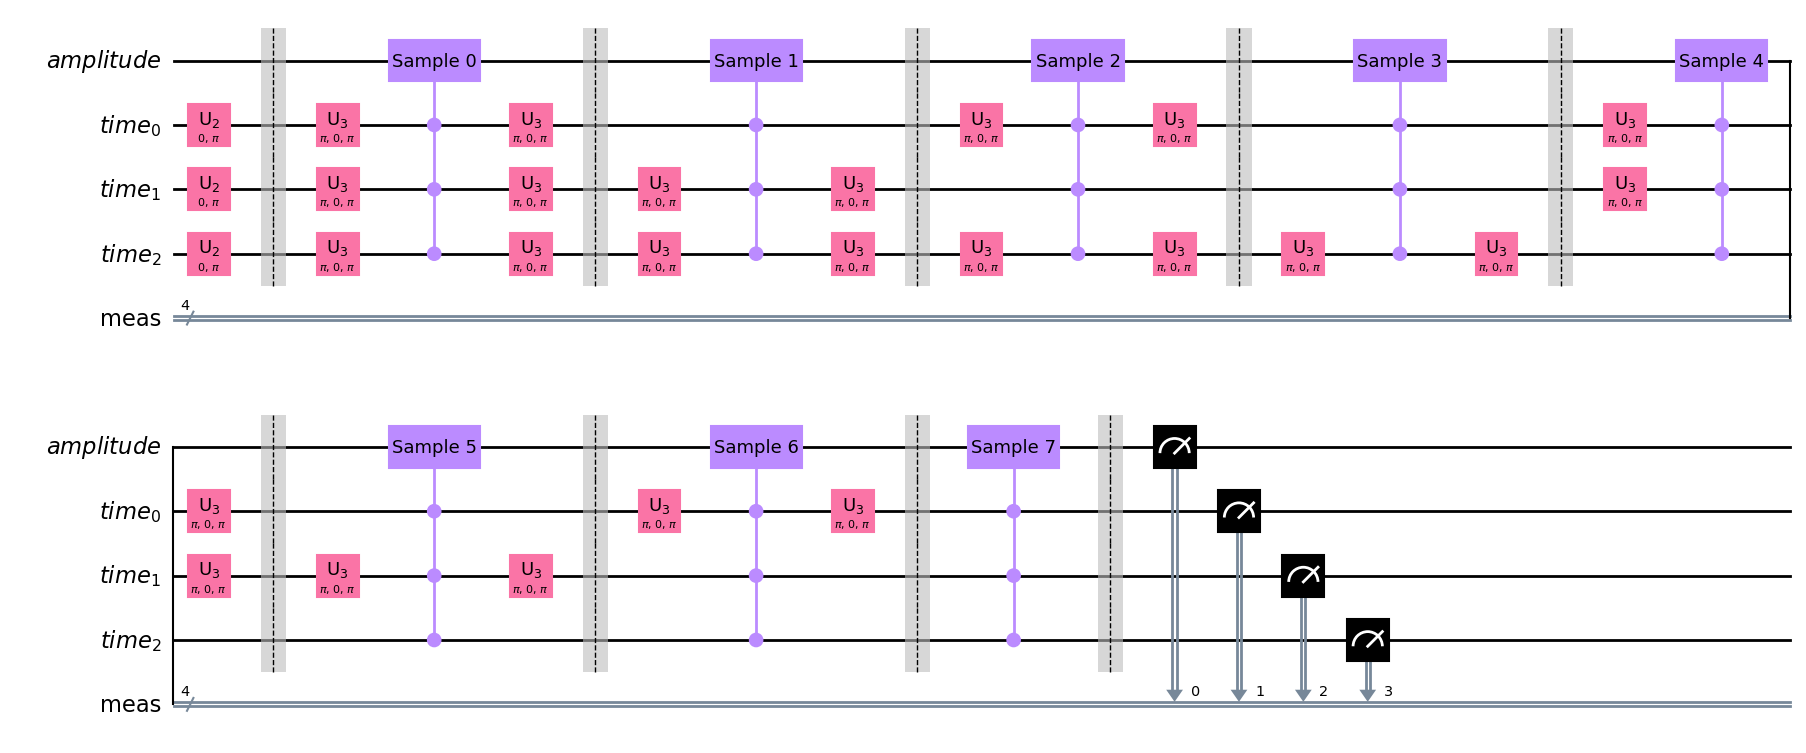

In [10]:
encoded_circuit = scheme.encode(signal,verbose=2) # verbose value 1 provides text information, 2 provides text with circuit (default). Turn off by setting it to 0.

In [11]:
decoded_signal = scheme.decode(encoded_circuit)

#### Compare Result

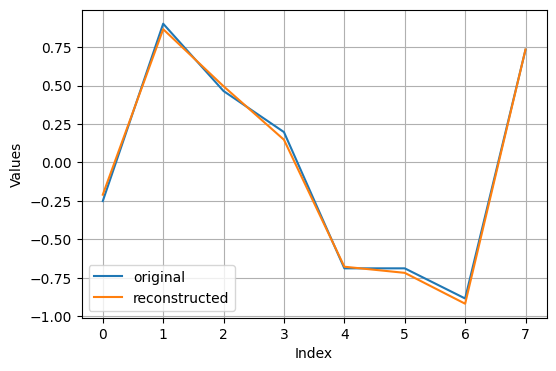

In [12]:
plot([signal,decoded_signal])

#### Interaction with Shots

Since a measurement in Quantum computing is probabilistic, it has to be repeated with N number of times (Shots) to get the probability distribution of the Quantum States of a given circuit. This section provides visualization of reconstructing a signal with respect to the number of shots.

In [13]:
from tools import interactive

In [ ]:
interactive.tune(encoded_circuit,function=scheme.decode,step=2,max_value=4000,ref=signal)

____

#### Multi-Channel Quantum Audio Scheme <a id="multi-channel"></a>

The following schemes included in the package can be used to encode a 1-Dimensional Signal:
- MSQPAM : Multi-channel Single-Qubit Probability Amplitude Modulation
- MQSM   : Multi-channel Quantum State Modulation

In [15]:
multi_channel_scheme = quantumaudio.MQSM() # a multi-channel quantum audio scheme. Replace 'mqsm' with 'msqpam' to try it out.

Multi-channel Quantum State Modulation


Number of qubits required: 8

3 qubits for time
1 qubits for channel
4 qubits for amplitude


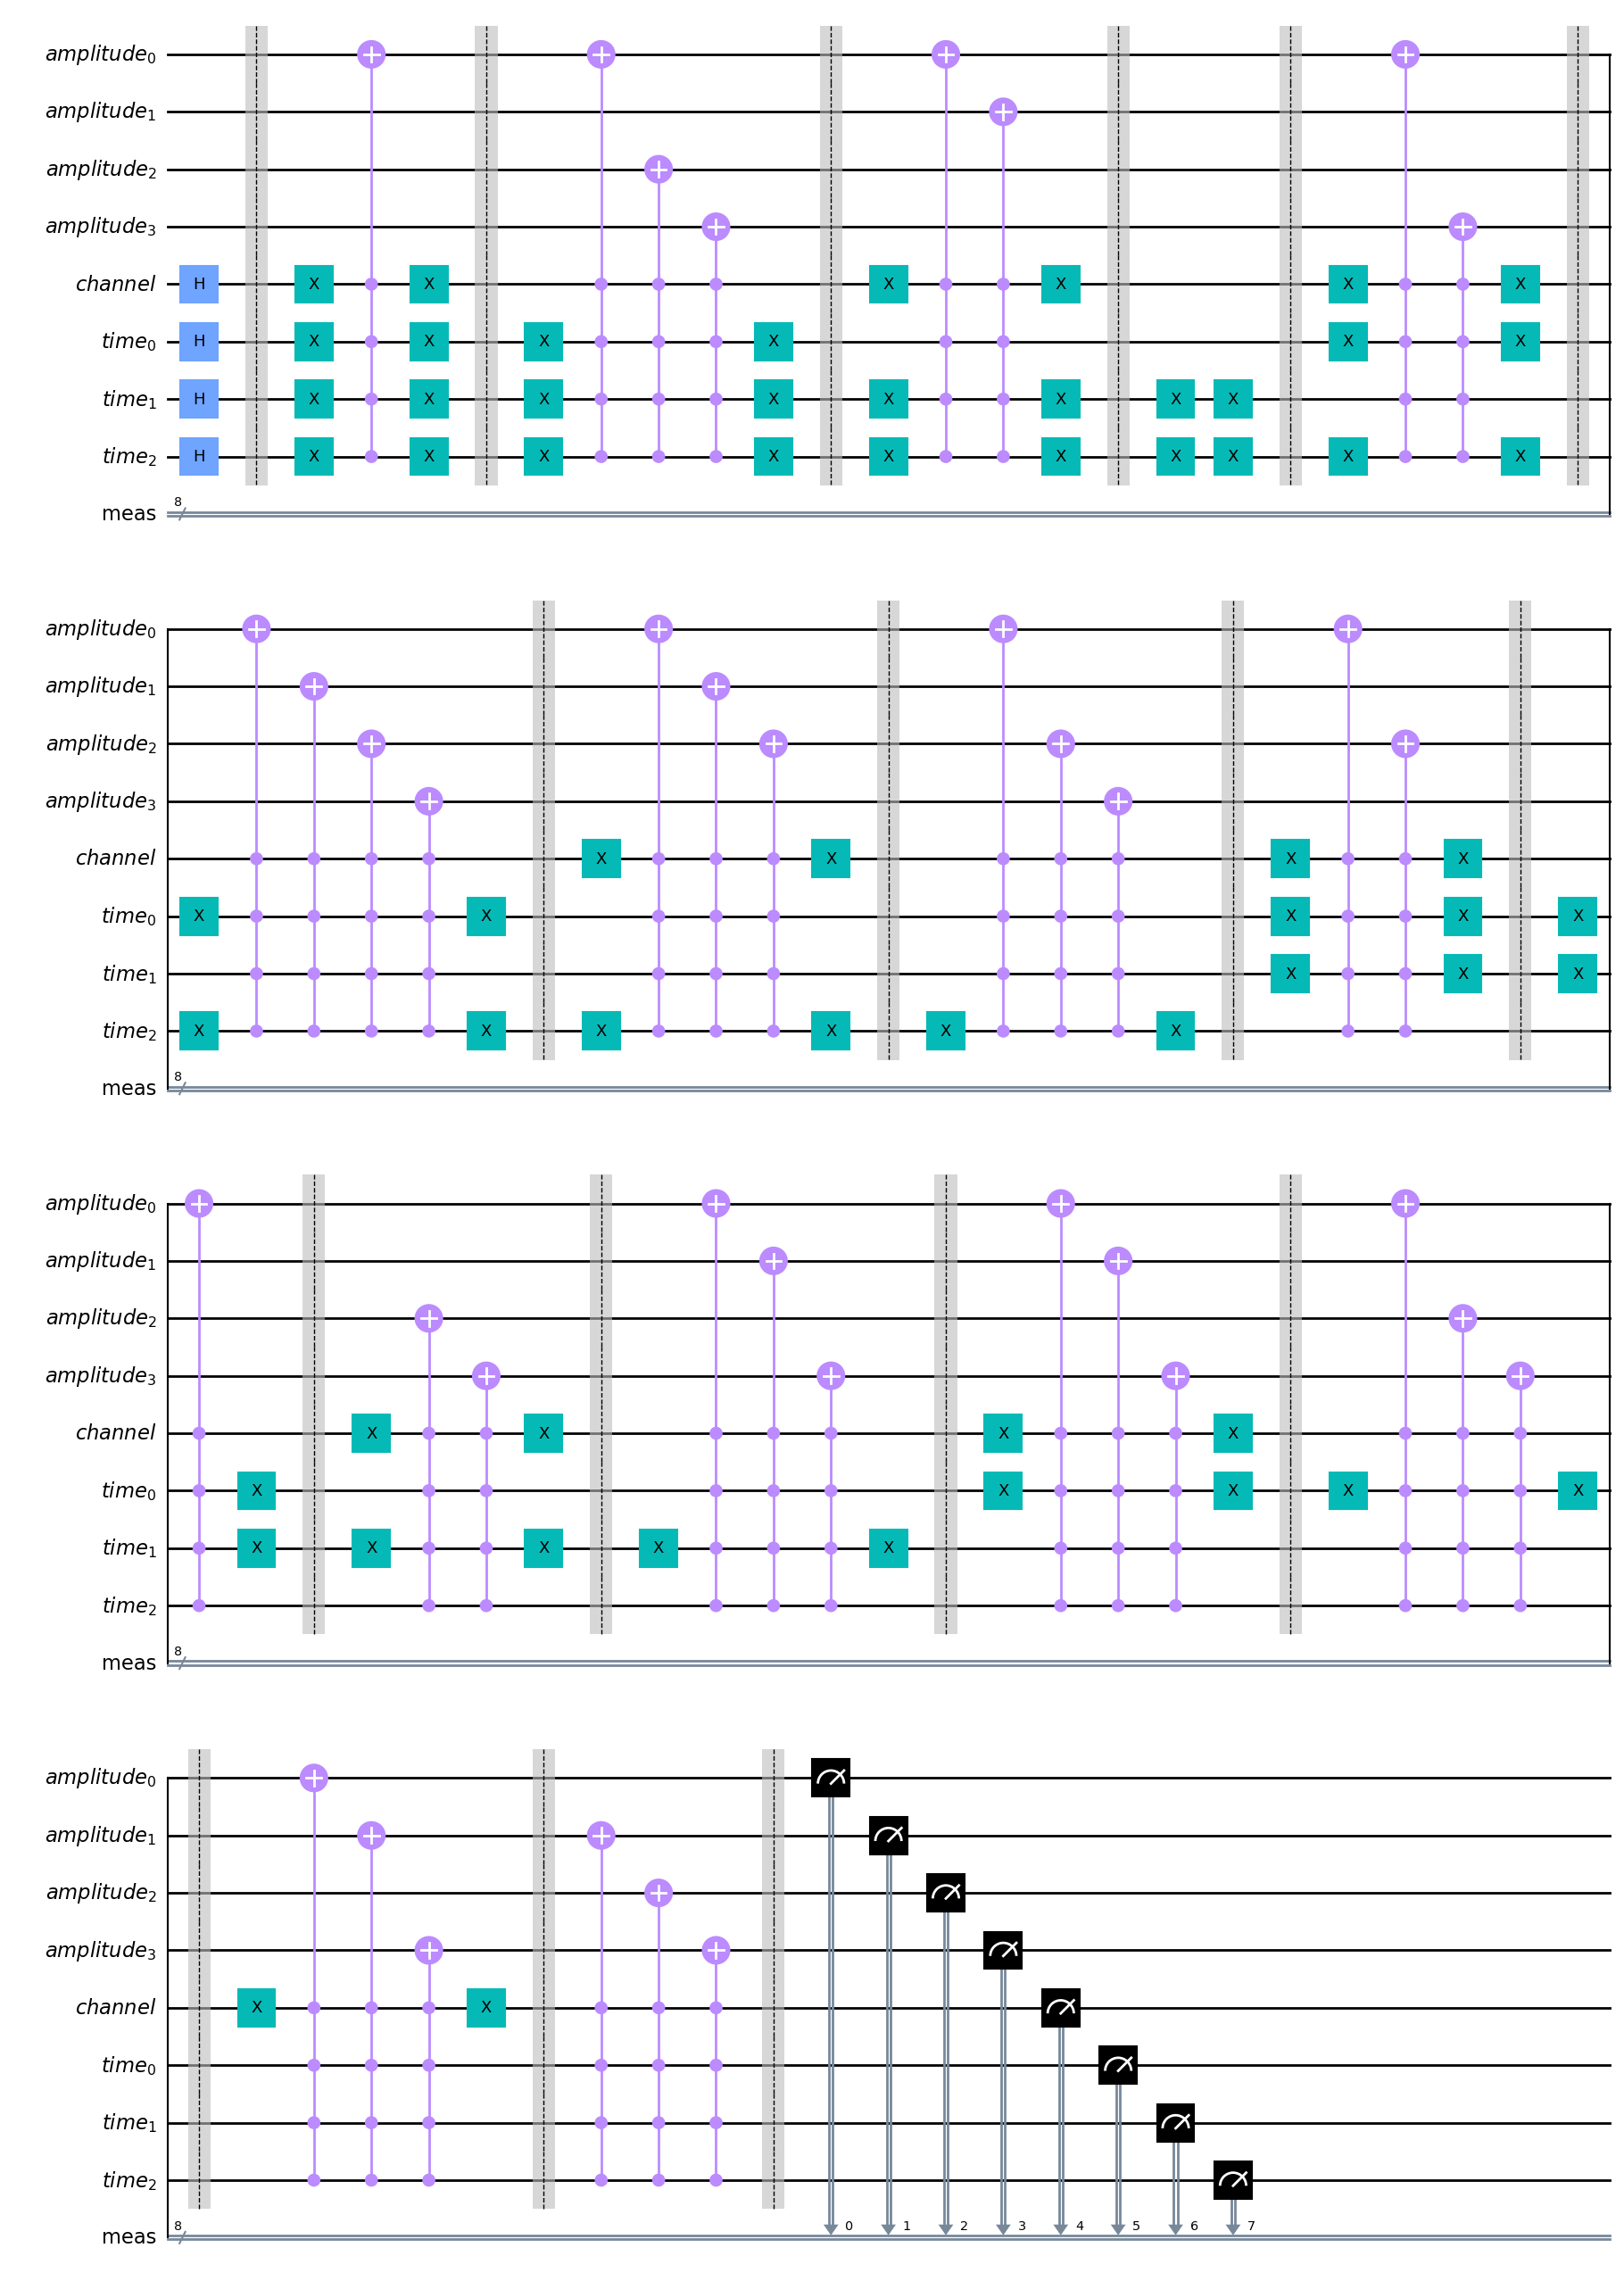

In [16]:
encoded_circuit = multi_channel_scheme.encode(stereo_signal,verbose=2) # verbose value 1 provides text information, 2 provides text with circuit (default). Turn off by setting it to 0.

In [17]:
decoded_stereo_signal = multi_channel_scheme.decode(encoded_circuit)

#### Compare Result

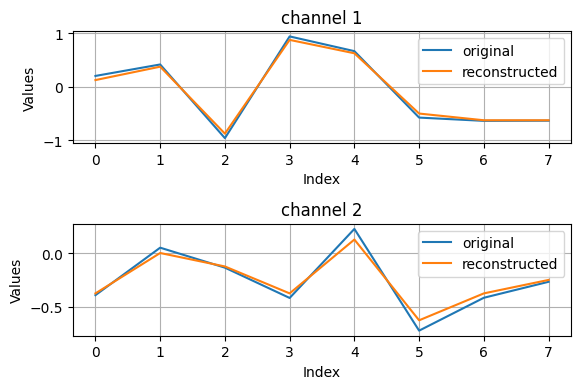

In [18]:
plot([stereo_signal,decoded_stereo_signal])

____

### 3) Examples with Audio <a id="audio"></a>

#### Loading Audio

The module ```audio``` contains I/O handling of digital audio using libraries librosa and soundfile. The module ```stream``` enables batch processing to efficiently process long audio files without increasing the ciruit depth.  

In [19]:
from tools import audio

In [20]:
path = 'media/audio_example.mp3'

In [ ]:
interactive.play(audio.read(path)[0],rate=22050) # preview original audio

#### Reconstruct Quantum Audio

In [22]:
qpam = quantumaudio.QPAM()

Quantum Probability Amplitude Modulation


In [23]:
y,sr = audio.stream_audio(path,scheme=qpam,shots=8000,mono=True)

Sample Rate: 22050
Shape: (99648,)
Num samples: 99648, Num channels: 1, Buffer size: 256
Number of chunks: 390
Shape per buffer: (1, 256)


100%|█████████████████████████████████████████| 390/390 [00:04<00:00, 83.85it/s]


In [ ]:
interactive.play(y,rate=sr) # Play reconstructed audio

In [30]:
#audio.write(y,sr=22050) # Export audio

In [31]:
#audio.save_audio(path,scheme=qpam) # Directly export from a path

#### Interaction with Shots

This section provides listening to Audio Output as it reconstructs from Quantum Audio Representation with respect to the number of shots.

In [27]:
from quantumaudio.tools import stream

In [28]:
audio_chunks = stream.get_chunks(audio.read(path)[0])

Shape: (99648,)
Num samples: 99648, Num channels: 1, Buffer size: 256
Number of chunks: 390
Shape per buffer: (1, 256)


In [ ]:
interactive.tune_audio(audio_chunks,scheme=qpam,function=stream.process_chunks)

____

### References <a id="references"></a>

- Itaboraí, P.V., Miranda, E.R. (2022). Quantum Representations of Sound: From Mechanical Waves to Quantum Circuits. In: Miranda, E.R. (eds) Quantum Computer Music. Springer, Cham. https://doi.org/10.1007/978-3-031-13909-3_10
    
- Itaboraí, P. V. (2023) Towards Quantum Computing for Audio and Music Expression. Thesis. University of Plymouth. Available at: https://doi.org/10.24382/5119

___

### Appendix <a id="appendix"></a>

#### Using Environment with Notebook

The environment can be used with notebook using the following steps:

- activate the environment in terminal
- do ```pip install ipykernel``` (can be skipped as it is already included in ```pip install quantumaudio[notebook]```)
- do ```python -m ipykernel install --user --name=kernel_name```
- In the top menu bar, go to **Kernel** and choose **Change Kernel**. Select the newly created kernel_name.  